In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys 
sys.path.append("../..")

from utils_common import EvalData

ModuleNotFoundError: No module named 'open3d'

## Extracting Test Data

In [ ]:
# pre-trained model
# model_file_name = "runs/Nov29_23-15-54_spark-agent/_model_best.pth"

In [ ]:
labels = ["modelnet noisy (deepgmr)",
          "shapenet.sim.easy", "shapenet.sim.medium", "shapenet.sim.hard",
          "shapenet.real.easy", "shapenet.real.medium", "shapenet.real.hard"]

files = []
# evaluated on: modelnet_noisy (deepgmr)
files.append("../runs/Dec02_17-15-53_spark-agent/eval_data.pkl")

# evaluated on: shapenet.sim.easy
files.append("../runs/Dec02_17-16-22_spark-agent/eval_data.pkl")

# evaluated on: shapenet.sim.medium
files.append("../runs/Dec02_17-17-16_spark-agent/eval_data.pkl")

# evaluated on: shapenet.sim.hard
files.append("../runs/Dec02_17-18-03_spark-agent/eval_data.pkl")

# evaluated on: shapenet.real.easy
files.append("../runs/Dec04_19-00-58_spark-agent/eval_data.pkl")

# evaluated on: shapenet.real.medium
files.append("../runs/Dec04_19-01-58_spark-agent/eval_data.pkl")

# evaluated on: shapenet.real.hard
files.append("../runs/Dec04_19-02-55_spark-agent/eval_data.pkl")

In [2]:
data = dict()

for i, label in enumerate(labels):
    eval_data = EvalData() 
    
    print("label: ", label)
    print("loading file: ", files[i])
    eval_data.load(files[i])
    
    eval_data.complete_eval_data()
    
    data[label] = eval_data.data

NameError: name 'labels' is not defined

## ADD-S and ADD-S (AUC)

In [3]:
df = pd.DataFrame(data, index=["adds_th_score", "adds_auc"])
display(df)

""
adds_th_score
adds_auc


## Distribution of Error Metrics

In [4]:
sns.set(style="darkgrid")
adds_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["adds"]}))
    adds_data[key] = df_


In [9]:
conca = pd.concat([adds_data[key].assign(dataset=key) for key in adds_data.keys()])

Text(0.5, 0, 'ADD-S')

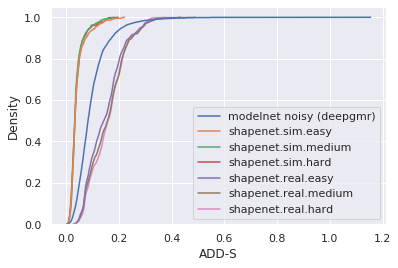

In [10]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
# plt.xlim(0, 0.5)
plt.xlabel('ADD-S')

In [11]:
sns.set(style="darkgrid")
rerr_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["rerr"]}))
    rerr_data[key] = df_


In [12]:
conca = pd.concat([rerr_data[key].assign(dataset=key) for key in rerr_data.keys()])

Text(0.5, 0, 'Rotation Error (axis-angle, in rad)')

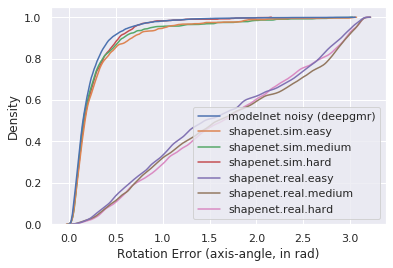

In [13]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('Rotation Error (axis-angle, in rad)')

In [14]:
sns.set(style="darkgrid")
terr_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["terr"]}))
    terr_data[key] = df_


In [15]:
conca = pd.concat([terr_data[key].assign(dataset=key) for key in terr_data.keys()])

Text(0.5, 0, 'Translation Error')

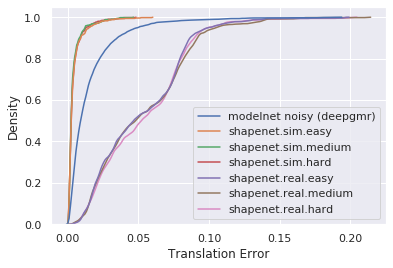

In [16]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('Translation Error')

## Conclusion

1. The supervised training on depth point clouds does not help. The DeepGMR paper does note similar limitations of the architecture in its work. However, we note here that further supervised training on real data does not yield any significant performance gain for DeepGMR.